In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import urllib.request as ur
from urllib.request import urlopen
import yfinance as yf
import numpy as np


from respective of current time: 2022-12-31 
Reasonable Price Between 17 and 20
[*********************100%***********************]  1 of 1 completed


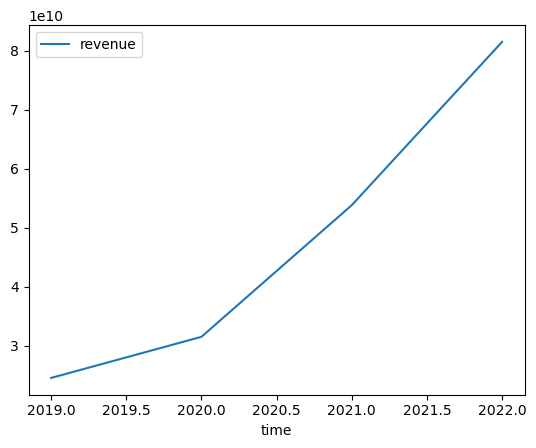

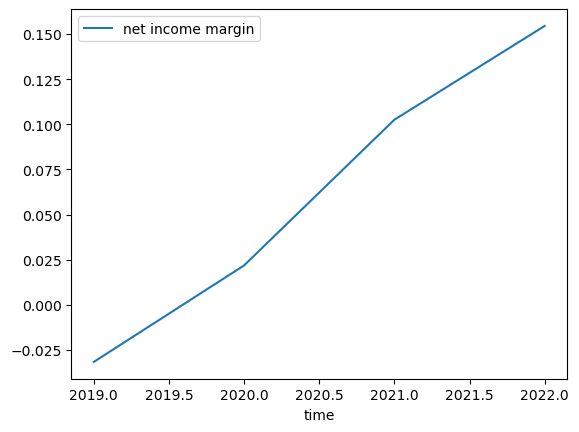

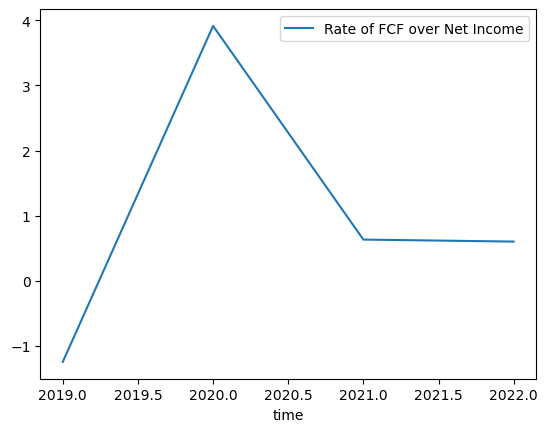

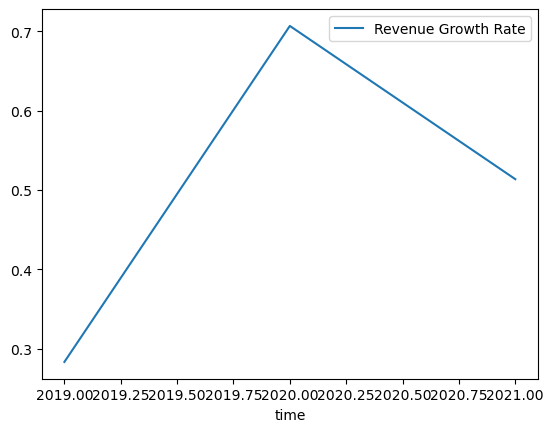

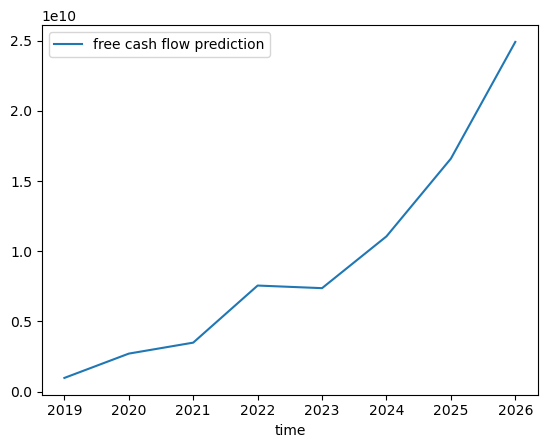

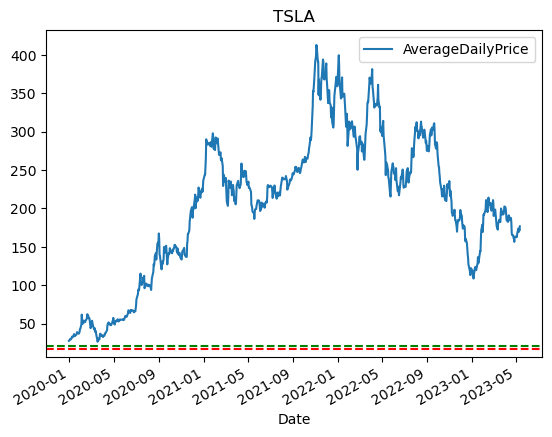

Using Caculated WACC as0.38446426961259134


In [3]:

Cash_Operation_List=[]
Captial_Expense_List=[]
Net_Income_list=[]
revenue_list=[]
time_list=[]

ticker=input("Please enter your ticker")
limit=20
pastyear=4
nowyear=2022
key="6e9eeec974de71f2e66bb39dfa0f2f71"
period='annual'



def get_income_statement(ticker, limit, key, period):
    """Get the Income Statement."""
    URL = 'https://financialmodelingprep.com/api/v3/income-statement/'
    try:
        r = requests.get(
            '{}{}?period={}?limit={}&apikey={}'.format(URL,
                                                       ticker,
                                                       period,
                                                       limit,
                                                       key))
        incomeStatement = pd.DataFrame.from_dict(r.json()).transpose()
        incomeStatement.columns = incomeStatement.iloc[0]
        return incomeStatement[1:]
    except requests.exceptions.HTTPError as e:
        print('Requesting Income statement sheet ERROR: ', str(e))



def get_balance_sheet(ticker, limit, key, period):
    """Get the Balance sheet."""
    URL = 'https://financialmodelingprep.com/api/v3/balance-sheet-statement/'
    try:
        r = requests.get(
            '{}{}?period={}&?limit={}&apikey={}'.format(URL,
                                                        ticker,
                                                        period,
                                                        limit,
                                                        key))
        balanceSheet = pd.DataFrame.from_dict(r.json()).transpose()
        balanceSheet.columns = balanceSheet.iloc[0]
        return balanceSheet[1:]
    except requests.exceptions.HTTPError as e:
        # We want a 200 value
        print('Requesting Balance sheet statement ERROR: ', str(e))



def get_cash_flow_statement(ticker, limit, key, period):
    """Get the Cash flow statements."""
    URL = 'https://financialmodelingprep.com/api/v3/cash-flow-statement/'
    try:
        r = requests.get(
            '{}{}?period={}&?limit={}&apikey={}'.format(URL,
                                                        ticker,
                                                        period,
                                                        limit,
                                                        key))
        cashFlow = pd.DataFrame.from_dict(r.json()).transpose()
        cashFlow.columns = cashFlow.iloc[0]
        return cashFlow[1:]
    except requests.exceptions.HTTPError as e:
        print('Requesting Cash flow statement ERROR: ', str(e))


def get_financial_ratios(ticker, limit, key, period):
    """Period is ttm | annual | quarter."""
    URL = 'https://financialmodelingprep.com/api/v3/'
    if period == "ttm":
        try:
            r = requests.get(
                '{}/ratios-ttm/{}?{}&apikey={}'.format(URL,
                                                       ticker,
                                                       period,
                                                       key))
            fr = pd.DataFrame.from_dict(r.json()).transpose()
            fr.columns = [ticker + " TTM Ratios"]
            return fr
        except requests.exceptions.HTTPError as e:
            print('Requesting Financial ratios ERROR(1): ', str(e))
    elif period == "annual" or period == "quarter":
        try:
            r = requests.get(
                '{}ratios/{}?period={}&?limit={}&apikey={}'.format(URL,
                                                                   ticker,
                                                                   period,
                                                                   limit,
                                                                   key))
            fr = pd.DataFrame.from_dict(r.json()).transpose()
            fr.columns = fr.iloc[1]
            return fr[2:]
        except requests.exceptions.HTTPError as e:
            print('Requesting Financial ratios ERROR(2): ', str(e))
    else:
        print('ERROR: Define the period you want: ttm | annual | quarter')
        return None


def get_key_metrics(ticker, limit, key, period):

    URL = 'https://financialmodelingprep.com/api/v3/'
    if period == "ttm":
        try:
            r = requests.get(
                '{}key-metrics-ttm/{}?apikey={}'.format(URL, ticker, key))
            km = pd.DataFrame.from_dict(r.json()).transpose()
            km.columns = [ticker + " TTM Ratios"]
            return km
        except requests.exceptions.HTTPError as e:
            print('Requesting Key Metrics ERROR(1): ', str(e))
    elif period == "annual" or period == "quarter":
        try:
            r = requests.get(
                '{}key-metrics/{}?period={}&?limit={}&apikey={}'.format(URL,
                                                                        ticker,
                                                                        period,
                                                                        limit,
                                                                        key))
            km = pd.DataFrame.from_dict(r.json()).transpose()
            km.columns = km.iloc[1]
            return km[2:]
        except requests.exceptions.HTTPError as e:
            print('Requesting Key Metrcs ERROR(2): ', str(e))
    else:
        print('ERROR: Define the period you want: ttm | annual | quarter')
        return None


def get_daily_prices(ticker, timeseries, key):
    """Parameter: timeseries in this case is the number of days. (gets closing prices)"""
    URL = 'https://financialmodelingprep.com/api/v3/technical_indicator/daily/'
    try:
        r = requests.get('{}{}?timeseries={}&apikey={}'.format(URL,
                                                               ticker,
                                                               timeseries,
                                                               key))
        return pd.DataFrame.from_dict(r.json())['close'].apply(pd.Series)
    except requests.exceptions.HTTPError as e:
        print('Requesting daily Prices ERROR: ', str(e))


def get_enterprise_value(ticker, rate, key, period):
    """Period is annual or quarter. The rate is the number of days."""
    URL = 'https://financialmodelingprep.com/api/v3/enterprise-values/'
    try:
        r = requests.get('{}{}?period={}&limit={}&apikey={}'.format(URL,
                                                                    ticker,
                                                                    period,
                                                                    rate,
                                                                    key))
        return pd.DataFrame.from_dict(r.json())
    except requests.exceptions.HTTPError as e:
        print('Requesting Enterprise Value ERROR: ', str(e))

        
df_income_statement=get_income_statement(ticker,limit,key,period)
df_cash_flow_statement=get_cash_flow_statement(ticker,limit,key,period)
df_balance=get_balance_sheet(ticker,limit,key,period)
Cash_Operation_List=list(df_cash_flow_statement.loc['operatingCashFlow'][:pastyear].copy().values).copy()
Captial_Expense_List=list(df_cash_flow_statement.loc['capitalExpenditure'][:pastyear].copy().values).copy()
Net_Income_list=list(df_income_statement.loc['netIncome'][:pastyear].copy().values).copy()
revenue_list=list(df_income_statement.loc['revenue'][:pastyear].copy().values).copy()
time_list=[nowyear-i for i in range(pastyear-1,-1,-1)]
df_get_enterprise_value=get_enterprise_value(ticker,limit,key,'annual')


revenue_list.reverse()
Cash_Operation_List.reverse()
Captial_Expense_List.reverse()
Net_Income_list.reverse()



Present_Year=time_list[0]

Net_Income_Margin_list=[]
for i in range(0,len(Net_Income_list)):
    Net_Income_Margin_list.append(Net_Income_list[i]/revenue_list[i])
    

Free_Cash_Flow_list=[]
for i in range(0,len(Cash_Operation_List)):
    Free_Cash_Flow_list.append(Cash_Operation_List[i]-abs(Captial_Expense_List[i]))


FCF_Net_Income_Rate_List=[]
for i in range(0,len(Free_Cash_Flow_list)):
   FCF_Net_Income_Rate_List.append(Free_Cash_Flow_list[i]/Net_Income_list[i])


growth_rate_list=[]
for i in range(0,len(revenue_list)-1):
    growth_rate_list.append((revenue_list[i+1]-revenue_list[i])/revenue_list[i])







df_revenue=pd.DataFrame({'time':time_list,'revenue':revenue_list})
df_Net_Income_Margin=pd.DataFrame({'time':time_list,'net income margin':Net_Income_Margin_list})
df_FCF_NI_Rate=pd.DataFrame({'time':time_list,'Rate of FCF over Net Income':FCF_Net_Income_Rate_List})
time_list2=time_list.copy()
time_list2.remove(time_list2[-1])
df_growth_rate=pd.DataFrame({'time':time_list2,'Revenue Growth Rate':growth_rate_list})

df_revenue.plot(x='time',y='revenue')
df_Net_Income_Margin.plot(x='time',y='net income margin')
df_FCF_NI_Rate.plot(x='time',y='Rate of FCF over Net Income')
df_growth_rate.plot(x='time',y='Revenue Growth Rate')


choose_growth_rate=sum(growth_rate_list)/len(growth_rate_list)
choose_net_income_margin_rate=sum(Net_Income_Margin_list)/len(Net_Income_Margin_list)
choose_free_cash_flow_NI_rate=sum(FCF_Net_Income_Rate_List)/len(FCF_Net_Income_Rate_List)
prediction_time=4


# choose_growth_rate=growth_rate_list[-1]
# choose_growth_rate=(growth_rate_list[-1]+growth_rate_list[-2])/2
# choose_net_income_margin_rate=Net_Income_Margin_list[-1]
# choose_free_cash_flow_NI_rate=FCF_Net_Income_Rate_List[-1]
# prediction_time=4

list3=time_list.copy()
revenue_list1=revenue_list.copy()
Net_Income_list1=Net_Income_list.copy()
Free_Cash_Flow_list1=Free_Cash_Flow_list.copy()


Back_Up_Time_List=list(range(list3[-1]+1,list3[-1]+prediction_time+1))
list3=list3+list(range(list3[-1]+1,list3[-1]+prediction_time+1))
Back_Up_Free_Cash_Flow=[]

for i in range(0,prediction_time):
    a=revenue_list1[-1]*(1+choose_growth_rate)
    revenue_list1.append(a)
    b=revenue_list1[-1]*(choose_net_income_margin_rate)
    Net_Income_list1.append(b)
    c=Net_Income_list1[-1]*(choose_free_cash_flow_NI_rate)
    Free_Cash_Flow_list1.append(c)
    Back_Up_Free_Cash_Flow.append(c)

df_future_free_cash_flow=pd.DataFrame({'time':list3,'free cash flow prediction':Free_Cash_Flow_list1})
df_future_free_cash_flow.plot(x='time',y='free cash flow prediction')

total_debt=list(df_get_enterprise_value['addTotalDebt'][:1].values)[0]
Market_Cap=list(df_get_enterprise_value['marketCapitalization'][:1].values)[0]
OutstandingSharing=list(df_get_enterprise_value['numberOfShares'][:1].values)[0]
Interest_Expense=list(df_income_statement.loc['interestExpense'][:1].values)[0]
Long_Term_Debt=list(df_balance.loc['longTermDebt'][:1].values)[0]
Short_Term_Debt=list(df_balance.loc['shortTermDebt'][:1].values)[0]
Income_Tax=list(df_income_statement.loc['incomeTaxExpense'].values)[0]
Income_Before_Tax=list(df_income_statement.loc['incomeBeforeTax'].values)[0]




Risk_Free_Rate=0.0353

Beta=input("What is the Beta of Your Company")
Beta=float(Beta)

# Expect_Return=0.1

Expect_Return=input("What is Expect Return")
Expect_Return=float(Expect_Return)
Perpetual_Growth=0.03

Weight_of_debt=total_debt/(total_debt+Market_Cap) # Wd Weight of Debt
Weight_of_equity=1-Weight_of_debt #We Weight of Equity 
Cost_of_Debt=Interest_Expense/(Long_Term_Debt+Short_Term_Debt) #Rd Cost of Debt
Save_after_Tax_Percent=1-(Income_Tax/Income_Before_Tax) # (1-T) Saving Rate from Tax
Cost_of_Equity=Risk_Free_Rate+Beta*(Expect_Return-Risk_Free_Rate)
Required_Return=(Weight_of_debt*Cost_of_Debt*Save_after_Tax_Percent)+(Weight_of_equity*Cost_of_Equity)
# WACC=input("What is the WACC")
# WACC=float(WACC)
# Required_Return=WACC
Terminal_Value=(Back_Up_Free_Cash_Flow[-1]*(1+Perpetual_Growth))/(Required_Return-Perpetual_Growth)

a=Back_Up_Free_Cash_Flow[-1]
Terminal_Value=(a*(1+Perpetual_Growth))/(Required_Return-Perpetual_Growth)
Back_Up_Free_Cash_Flow.append(Terminal_Value)
Back_Up_Time_List.append(Back_Up_Time_List[-1])

period=1;
Present_Value_Total=[]
for i in range(0,len(Back_Up_Free_Cash_Flow)):
    Present_Value_Now=Back_Up_Free_Cash_Flow[i]/((1+Required_Return)**(i+1))
    Present_Value_Total.append(Present_Value_Now)

Present_Value_Sum=sum(Present_Value_Total)+Terminal_Value/((1+Required_Return)**(prediction_time))

Final_Price=Present_Value_Sum/OutstandingSharing

Final_Price_Between=[]

Final_Price_Between.append(abs(Final_Price)*(1.1)) 
Final_Price_Between.append(abs(Final_Price)*(0.9)) 

time_of_current=df_cash_flow_statement.loc['operatingCashFlow'].index[0]
print(f"from respective of current time: {time_of_current} ")
print(f"Reasonable Price Between {round(Final_Price_Between[1])} and {round(Final_Price_Between[0])}")




start_date = df_cash_flow_statement.loc['operatingCashFlow'].index[3]

data = yf.download(ticker, start_date)

data['AverageDailyPrice']=(data['Open']+data['High'])/2
data['AverageDailyPrice']

ax =data.plot(y='AverageDailyPrice')
plt.title(f"{ticker}")
plt.xlabel(data.index.name)

ax.axhline(y=Final_Price_Between[1], color='red', linestyle='--')
ax.axhline(y=Final_Price_Between[0], color='green', linestyle='--')

# vline_timestamp = time_of_current
# ax.axvline(x=vline_timestamp, color='blue', linestyle='-.')

plt.show()
print("Using Caculated WACC as"+f"{Required_Return}")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d3b442c8-d33a-4e92-a6e4-0df06cd68888' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>